# Name : Piyush Sharma

# Organisation : The Sparks Foundation 

# Task 7 : Stock Market Prediction using Numerical and Textual Analysis

### Importing libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas_datareader import data
import datetime

### Analysis of Stock Price from 2019-01-01 (1 January 2019) to 2021-03-09 (9 March 2021).

In [3]:
start_date = '2019-01-01'
end_date = '2021-03-09'

In [4]:
dt = data.DataReader('^BSESN','yahoo',start_date,end_date)
dt

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,36236.699219,35734.011719,36198.128906,35891.519531,14705400.0,35891.519531
2019-01-03,35999.660156,35475.570312,35934.500000,35513.710938,17400.0,35513.710938
2019-01-04,35744.199219,35382.078125,35590.789062,35695.101562,15855600.0,35695.101562
2019-01-07,36076.949219,35809.230469,35971.179688,35850.160156,14831200.0,35850.160156
2019-01-08,36037.351562,35753.949219,35964.621094,35980.929688,16218000.0,35980.929688
...,...,...,...,...,...,...
2021-03-03,51539.890625,50512.839844,50738.210938,51444.648438,15800.0,51444.648438
2021-03-04,51256.550781,50539.921875,50812.140625,50846.078125,21800.0,50846.078125
2021-03-05,50886.191406,50160.539062,50517.359375,50405.320312,19200.0,50405.320312


### Stock Price that was closed at the end of particular day 

In [5]:
close = dt['Close']
close

Date
2019-01-02    35891.519531
2019-01-03    35513.710938
2019-01-04    35695.101562
2019-01-07    35850.160156
2019-01-08    35980.929688
                  ...     
2021-03-03    51444.648438
2021-03-04    50846.078125
2021-03-05    50405.320312
2021-03-08    50441.070312
2021-03-09    51025.480469
Name: Close, Length: 536, dtype: float64

In [6]:
all_weekdays = pd.date_range(start_date,end_date)

### Cleaning the data

In [7]:
close = close.reindex(all_weekdays)
close

2019-01-01             NaN
2019-01-02    35891.519531
2019-01-03    35513.710938
2019-01-04    35695.101562
2019-01-05             NaN
                  ...     
2021-03-05    50405.320312
2021-03-06             NaN
2021-03-07             NaN
2021-03-08    50441.070312
2021-03-09    51025.480469
Freq: D, Name: Close, Length: 799, dtype: float64

In [8]:
close= close.fillna(method='ffill')
close

2019-01-01             NaN
2019-01-02    35891.519531
2019-01-03    35513.710938
2019-01-04    35695.101562
2019-01-05    35695.101562
                  ...     
2021-03-05    50405.320312
2021-03-06    50405.320312
2021-03-07    50405.320312
2021-03-08    50441.070312
2021-03-09    51025.480469
Freq: D, Name: Close, Length: 799, dtype: float64

In [9]:
close=close.fillna(method='bfill')
close

2019-01-01    35891.519531
2019-01-02    35891.519531
2019-01-03    35513.710938
2019-01-04    35695.101562
2019-01-05    35695.101562
                  ...     
2021-03-05    50405.320312
2021-03-06    50405.320312
2021-03-07    50405.320312
2021-03-08    50441.070312
2021-03-09    51025.480469
Freq: D, Name: Close, Length: 799, dtype: float64

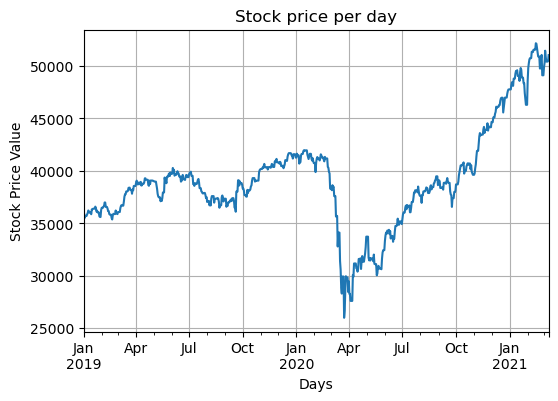

In [44]:
plt.figure(dpi=100)
close.plot()
plt.xlabel('Days')
plt.ylabel('Stock Price Value')
plt.title('Stock price per day')
plt.grid()
plt.show()

In [11]:
close_data = pd.DataFrame(close)
close_data

,Close
2019-01-01,35891.519531
2019-01-02,35891.519531
2019-01-03,35513.710938
2019-01-04,35695.101562
2019-01-05,35695.101562
...,...
2021-03-05,50405.320312
2021-03-06,50405.320312
2021-03-07,50405.320312
2021-03-08,50441.070312


### Applying SARIMAX model for prediction

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
sari = SARIMAX(close_data,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

In [14]:
pred_data = sari.predict(start=start_date,end=end_date)

pred_data

2019-01-01        0.000000
2019-01-02    35891.519210
2019-01-03    35891.519234
2019-01-04    35513.710671
2019-01-05    35695.101317
                  ...     
2021-03-05    50882.985669
2021-03-06    50188.108239
2021-03-07    50400.500659
2021-03-08    50640.611581
2021-03-09    50600.224599
Freq: D, Length: 799, dtype: float64

In [15]:
pred_data= pred_data.fillna(method='ffill')
pred_data.iloc[0]=pred_data.iloc[1]

### Actual Stock Price vs Predicted Stock Price graph

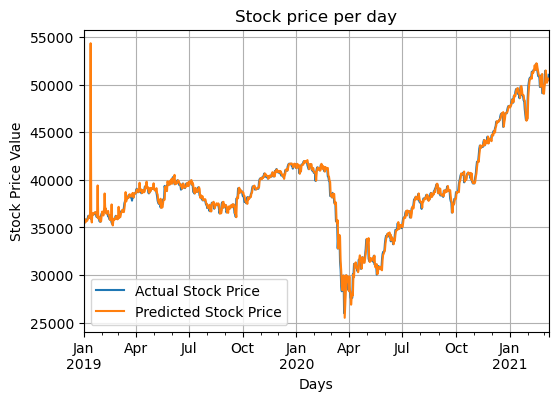

In [45]:
plt.figure(dpi=100)
close.plot(label='Actual Stock Price')
pred_data.plot(label='Predicted Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price Value')
plt.title('Stock price per day')
plt.grid()
plt.legend()
plt.show()

### Now Predicting Future Stock Price values

In [17]:
future_pred = sari.get_prediction(start=pd.to_datetime(end_date),end=pd.to_datetime(end_date)+datetime.timedelta(weeks=6))
future_pred

In [18]:
future_pred_ci = future_pred.conf_int()
future_pred_ci

,lower Close,upper Close
2021-03-09,49744.233352,51456.215846
2021-03-10,49906.132542,51618.115036
2021-03-11,49487.648283,51908.754170
2021-03-12,49244.731731,52209.965111
2021-03-13,49136.520584,52560.472969
2021-03-14,48999.954463,52828.044922
2021-03-15,49052.462078,53245.904360
2021-03-16,48817.647584,53347.008873
2021-03-17,48623.490388,53465.520412
2021-03-18,48438.461804,53574.158585


In [19]:
future_pred_mean = future_pred.predicted_mean
future_pred_mean

2021-03-09    50600.224599
2021-03-10    50762.123789
2021-03-11    50698.201226
2021-03-12    50727.348421
2021-03-13    50848.496777
2021-03-14    50913.999693
2021-03-15    51149.183219
2021-03-16    51082.328229
2021-03-17    51044.505400
2021-03-18    51006.310194
2021-03-19    51000.473369
2021-03-20    51080.169116
2021-03-21    51295.784729
2021-03-22    51289.645606
2021-03-23    51215.912574
2021-03-24    51249.533127
2021-03-25    51274.191632
2021-03-26    51281.136720
2021-03-27    51376.263446
2021-03-28    51391.013166
2021-03-29    51415.030559
2021-03-30    51370.973376
2021-03-31    51364.240757
2021-04-01    51450.681061
2021-04-02    51609.696155
2021-04-03    51643.033356
2021-04-04    51567.794678
2021-04-05    51602.101786
2021-04-06    51611.951576
2021-04-07    51609.909545
2021-04-08    51683.541144
2021-04-09    51710.815108
2021-04-10    51744.323404
2021-04-11    51699.366566
2021-04-12    51692.496475
2021-04-13    51779.971905
2021-04-14    51930.300276
2

### Predicting future stock price in range

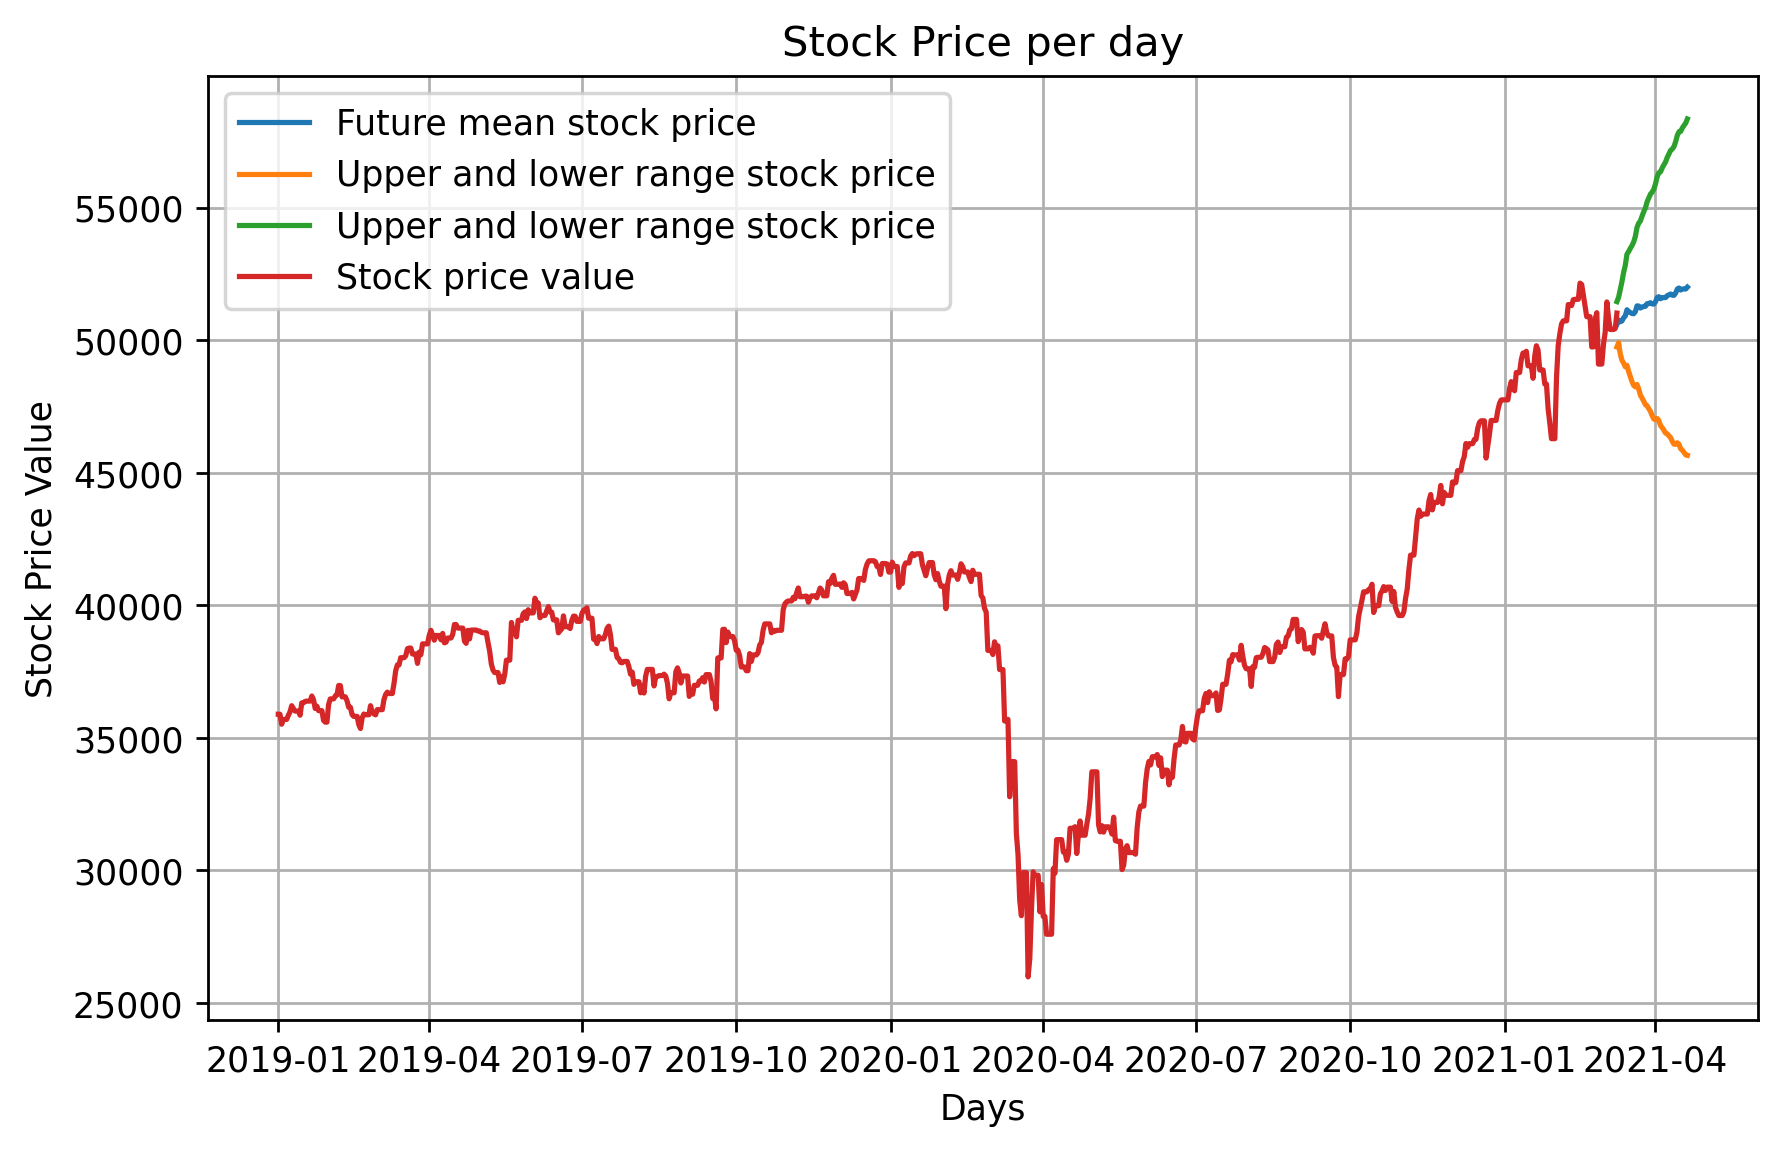

In [20]:
plt.figure(dpi=250,figsize=(8,5))
plt.plot(future_pred_mean,label='Future mean stock price')
plt.plot(future_pred_ci,label='Upper and lower range stock price')
plt.plot(close_data.index,close_data.Close,label='Stock price value')
plt.xlabel('Days')
plt.ylabel('Stock Price Value')
plt.title('Stock Price per day')
plt.legend()
plt.grid()
plt.show()

# Sentimental Analysis of News Headlines

### Reading the news headlines file 

In [21]:
# This file has a data from 2001-01-01 to 2020-12-31  

data= pd.read_csv('india-news-headlines.csv')
data

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [22]:
data= data.drop('headline_category',axis=1)

### Importing some important libraries

In [23]:
import string 
import re
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud , STOPWORDS

### String-Punctuations

In [24]:
word_punc = re.compile('[%s]'%re.escape(string.punctuation))
word_punc

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]',
re.UNICODE)

### Replacing punctuations by empty space

In [25]:
data['headline_text']=data['headline_text'].apply(lambda w: word_punc.sub('',w))

### Handling with texts

In [26]:
porter = PorterStemmer()
data['headline_text']=data['headline_text'].apply(lambda x: porter.stem(x))
data['headline_text']

0          status quo will not be disturbed at ayodhya sa...
1                        fissures in hurriyat over pak visit
2                        americas unwanted heading for india
3                          for bigwigs it is destination goa
4                         extra buses to clear tourist traff
                                 ...                        
3424062    covid19 despite dip in cases rajasthan among t...
3424063    covid19 despite dip in cases rajasthan among t...
3424064    covid19 despite dip in cases rajasthan among t...
3424065    govt extends deadline for use of fastag till f...
3424066    celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

### Checking the polarity of News Headline 

In [28]:
siu= SentimentIntensityAnalyzer()
data['Score']= data['headline_text'].apply(lambda s: siu.polarity_scores(s))

In [29]:
data['Compound']= data['Score'].apply(lambda d: d['compound'])

### Labelling the news as Positive or Negative

In [30]:
data['label']= data['Compound'].apply(lambda x: 'Positive' if x>=0 else 'Negative')

In [31]:
values= data.label.value_counts()
values

Positive    2450395
Negative     973672
Name: label, dtype: int64

### Total positive and negative headlines

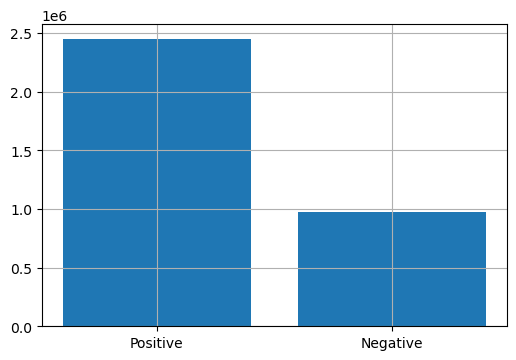

In [32]:
plt.figure(dpi=100)
plt.bar(values.index,values.values)
plt.grid()

In [33]:
stopwords=set(STOPWORDS)

### Word-Cloud of Sentimental Analysis of complete data from 2001-01-01 to 2020-12-31

In [35]:
words=''
for i in data['headline_text']:
    words+= i+' '
    

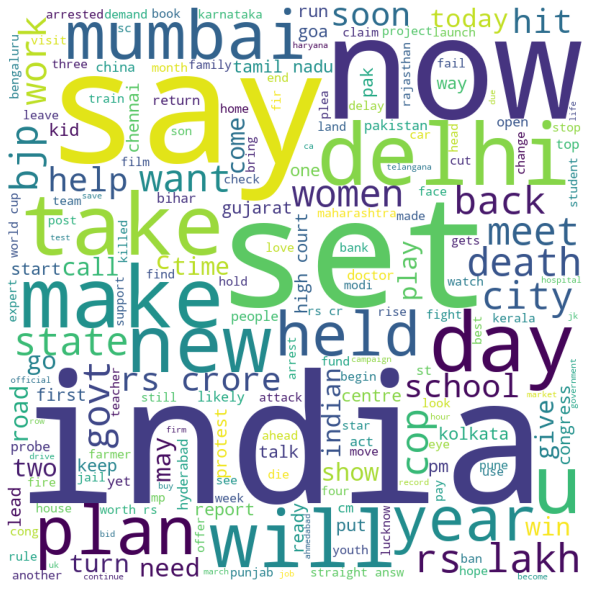

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### Word-Cloud of Sentimental Analysis of the data of Year 2020

In [37]:
twenty_twenty =data[data['publish_date']>=20201001]


In [39]:
word2=''
for j in twenty_twenty['headline_text']:
    word2+= j+' '


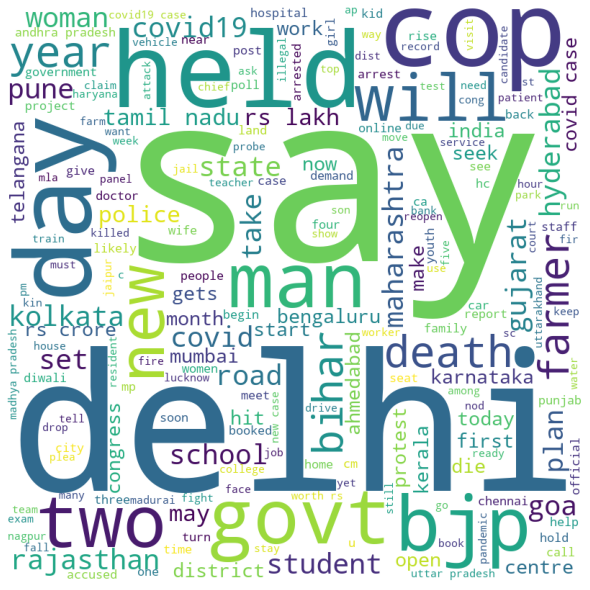

In [40]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(word2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [43]:
# From the above data we can see that year 2020 news had included Covid and Covid affected states most of the time.
#  So in this Stock Market have been in downward trend.